In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
import math as math

## Introduction

The main theme of our project is landscape evolution in regards to coastal erosion. Coastal erosion is the removal of sediment along a coastline due to the actions of water. This topic is important because coastlines around the world are losing tens of thousands of acres every year causing billions of dollars in damages to coastal properties. Coastlines are known for having high population densities due to their desirability so this is an issue that is and will continute to affect a large portion of the world's population.

In our project, we are modeling an oceanic coastline that is being subject to erosion by waves, however there is a constant flux of sediment (sand) that is supplied to the beach by people in the surrounding town. Other models that are used in relation to coastal erosion that are different than what we are using are models that account for sediment increase due to river deposition, models that do not account for any additional sediment deposition at all, and ones that are modeling river coastlines with different geographic structures than an oceanic coastline. Other models also use different methods of solving the diffusion equation such as the Backward Euler Method or Crank-Nicolson Method.

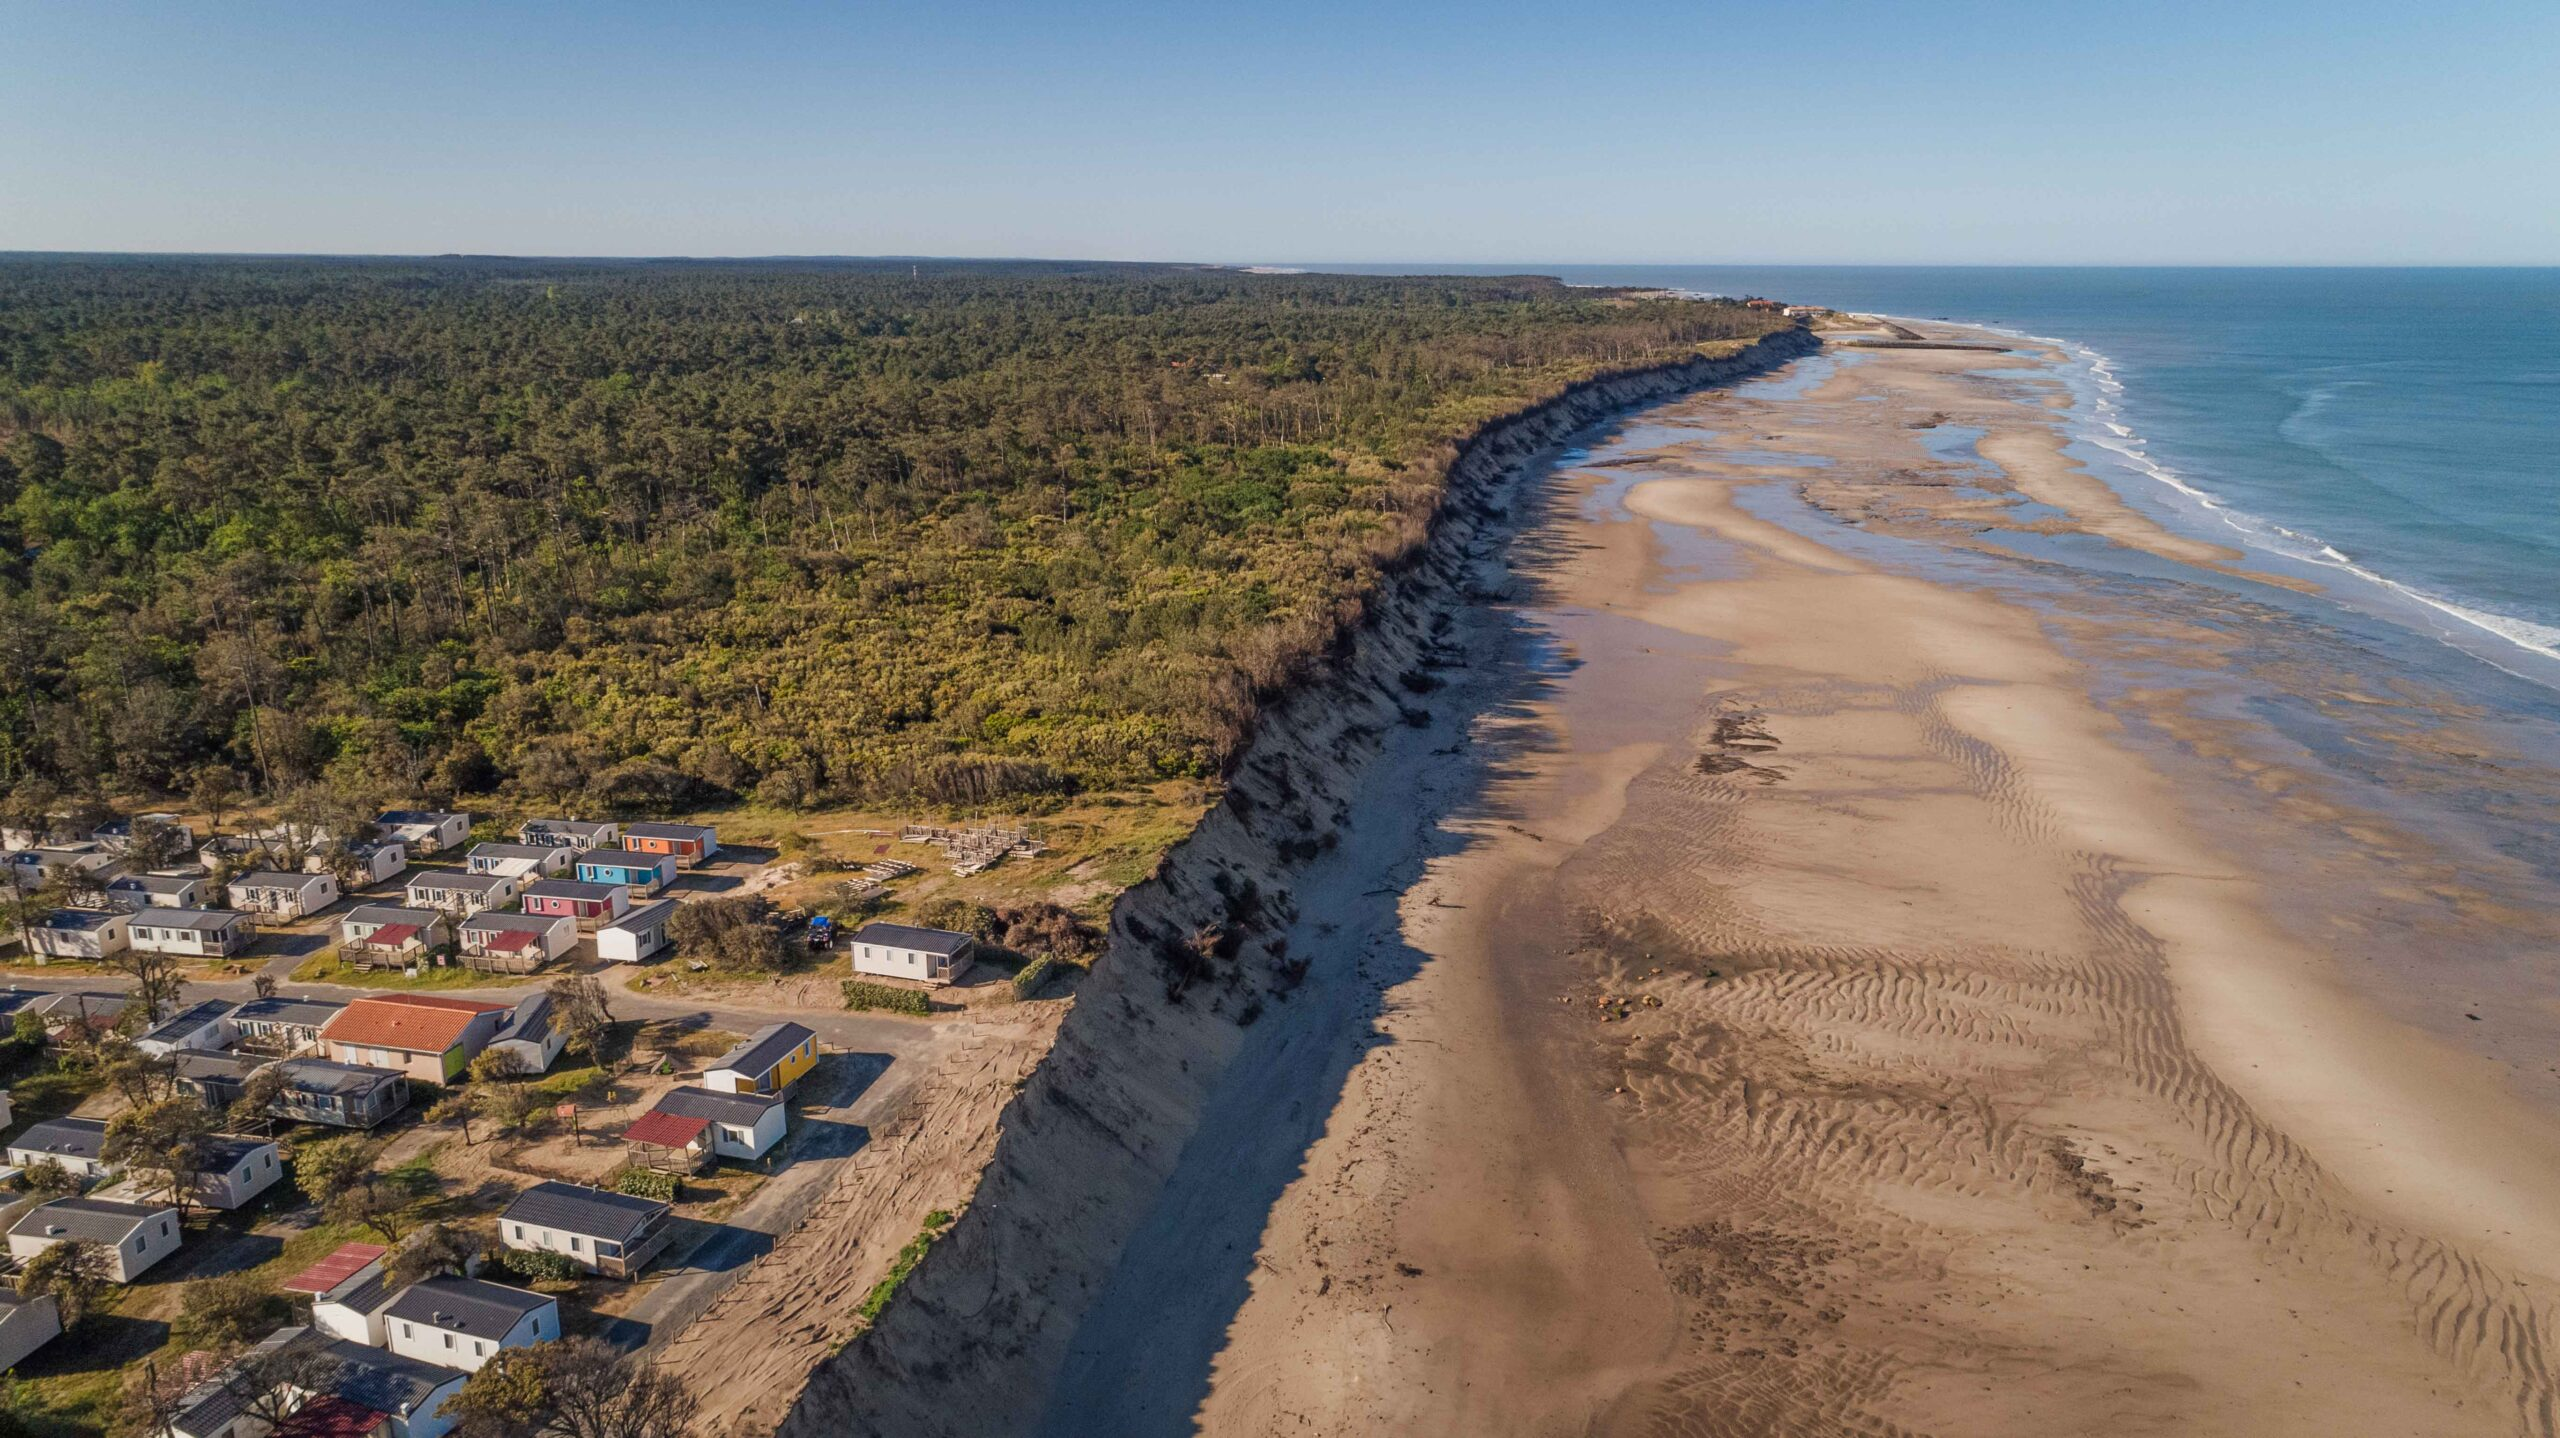

## Equations 

We consider the problem of landscape erosion with the differential equation: $$q_{s} = -D(s)\frac{\partial h}{\partial s}$$
and the diffusion equation: $$\frac{\partial h}{\partial t} = \frac{\partial^2 h}{\partial s^2}$$


and we consider the boundary condition: $$ h(s=0,t) = h_{max}$$ 

which implies that the sediment thickness is fixed at the maximum height at the initial boundary 

$$ D \frac{\partial h}{\partial s} = q_{N}(t, s>0) $$
first boundary (Dirichlet), 100 m inland from the coastline, where D is the diffusivity from the PDE in $ \frac {m^2}{s} $ and $q_n$ is the rate that the machine outputs sediment at. 

$$ h(t=0,s = L) = 0$$
which implies that the sediment thickness is fixed at zero at the final boundary.

The fundamental process being modeled is the erosion of a coastline. The process of erosion is diffusive meaning that the materials move at a rate proportional to the topographic slope. $q_s$ is the volumetric flux per unit of width measured in $\frac{m^3}{s*m}$, D(s) is the diffusivity which is measured in $\frac{m^2}{s}$, H is the elevation on the surface of the coastline in m, and s is the horizontal axis (either x or y) in m. 

## Numerical Methods 

To analyze the evolution of the landscape, we are employing the Forward Euler method to solve the diffusion equation. We will also alter the initial condition several times to evaluate how varying the initial conditions can affect the erosion of the landscape over time. We chose the Forward Euler method to solve the diffusion equation because it is a relatively simple method and because the simplicity of our model, we believe this method would accurately capture the results of the model. 

#### Set Parameters 

In [27]:
D = 100   #function of the slope of the bedrock and thickness of the sediment
L = 5000  #m distance into ocean when h = 0 
H_max_init = 1000 #m 
qN = -1e6 #input of sediment from town nurturing beach

n = 200
s = np.linspace(0,L,n)
ds = s[1] - s[0]
C_D = 0.1
dt = (ds**2)*C_D/D

tf = 60

nt = round(tf/dt) + 1

s = np.expand_dims(np.linspace(0, L, n), axis=1)
t = np.linspace(0, tf, nt+1)

#### Pre Allocate Vectors 

In [28]:
h = np.zeros([n, nt+1])
hinit = np.zeros([n, 1])

#### Diffusion evolution matrix 

In [29]:
data = np.array([C_D*np.ones(n), (1 - 2*C_D)*np.ones(n), C_D*np.ones(n)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, n, n).toarray()

#### Boundary Conditions

In [30]:
M[-1,-1] = 1
M[-1,-2] = 0

M[0,0] = 1-C_D
M[0,1] = C_D
dhdsn = qN/D
Fknown = np.zeros(n)
Fknown[0] = dhdsn*D*dt/ds

#### Initial Condition

In [31]:
s1 = (s<L) 

hinit[s1] = H_max_init*s[s1]/L

h[:,0] = hinit.transpose()

#### Run Model

In [32]:
for k in np.arange(0,nt):
    hnew = np.matmul(M,h[:,k]) - Fknown
    h[:,k+1] = hnew.transpose()

#### Plot

Text(0.5, 1.0, 'Coastline evolution over 1000 years with constant input of sediment')

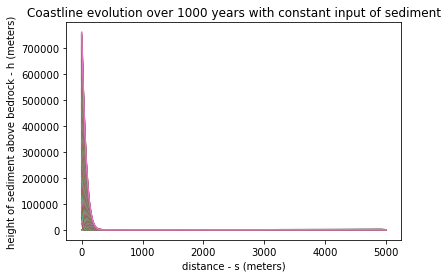

In [33]:
plt.plot(s,h)
plt.xlabel('distance - s (meters)')
plt.ylabel('height of sediment above bedrock - h (meters)')
plt.title ('Coastline evolution over 1000 years with constant input of sediment')

### Simulation with no sediment input 

In [81]:
qN = 0 #input of sediment from town nurturing beach

#### Pre Allocate Vectors 

In [82]:
h = np.zeros([n, nt+1])
hinit = np.zeros([n, 1])

#### Diffusion evolution matrix 

In [83]:
data = np.array([C_D*np.ones(n), (1 - 2*C_D)*np.ones(n), C_D*np.ones(n)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, n, n).toarray()

#### Boundary Conditions

In [84]:
M[-1,-1] = 1
M[-1,-2] = 0

M[0,0] = 1-C_D
M[0,1] = C_D
dhdsn = qN/D
Fknown = np.zeros(n)
Fknown[0] = dhdsn*D*dt/ds

#### Initial Condition

In [85]:
s1 = (x<L) 

hinit[s1] = H_max_init*s[s1]/L

h[:,0] = hinit.transpose()

#### Run Model

In [86]:
for k in np.arange(0,nt):
    hnew = np.matmul(M,h[:,k]) - Fknown
    h[:,k+1] = hnew.transpose()

#### Plot

Text(0.5, 1.0, 'Coastline evolution over 1000 years with no sediment input')

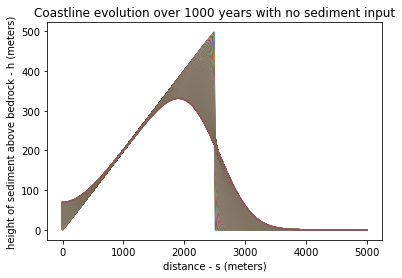

In [87]:
plt.plot(s,h)
plt.xlabel('distance - s (meters)')
plt.ylabel('height of sediment above bedrock - h (meters)')
plt.title ('Coastline evolution over 1000 years with no sediment input')

### Lower Sediment Input 

In [88]:
qN = 1e4 #input of sediment from town nurturing beach

#### Pre Allocate Vectors 

In [89]:
h = np.zeros([n, nt+1])
hinit = np.zeros([n, 1])

#### Diffusion evolution matrix 

In [90]:
data = np.array([C_D*np.ones(n), (1 - 2*C_D)*np.ones(n), C_D*np.ones(n)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, n, n).toarray()

#### Boundary Conditions

In [91]:
M[-1,-1] = 1
M[-1,-2] = 0

M[0,0] = 1-C_D
M[0,1] = C_D
dhdsn = qN/D
Fknown = np.zeros(n)
Fknown[0] = dhdsn*D*dt/ds

#### Initial Condition

In [92]:
s1 = (x<L) 

hinit[s1] = H_max_init*s[s1]/L

h[:,0] = hinit.transpose()

#### Run Model

In [93]:
for k in np.arange(0,nt):
    hnew = np.matmul(M,h[:,k]) - Fknown
    h[:,k+1] = hnew.transpose()

#### Plot

Text(0.5, 1.0, 'Coastline evolution over 1000 years with lower sediment input than intial run')

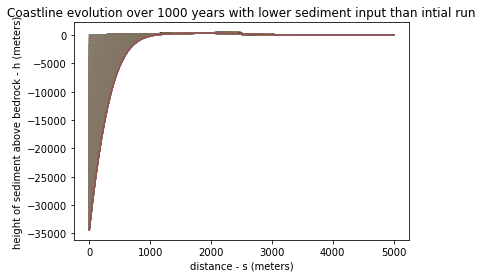

In [94]:
plt.plot(s,h)
plt.xlabel('distance - s (meters)')
plt.ylabel('height of sediment above bedrock - h (meters)')
plt.title ('Coastline evolution over 1000 years with lower sediment input than intial run')

### Simulation with more sediment input

In [95]:
qN = 1e8 #input of sediment from town nurturing beach

#### Pre Allocate Vectors 

In [96]:
h = np.zeros([n, nt+1])
hinit = np.zeros([n, 1])

#### Diffusion evolution matrix 

In [97]:
data = np.array([C_D*np.ones(n), (1 - 2*C_D)*np.ones(n), C_D*np.ones(n)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, n, n).toarray()

#### Boundary Conditions

In [98]:
M[-1,-1] = 1
M[-1,-2] = 0

M[0,0] = 1-C_D
M[0,1] = C_D
dhdsn = qN/D
Fknown = np.zeros(n)
Fknown[0] = dhdsn*D*dt/ds

#### Initial Condition

In [99]:
s1 = (x<L) 

hinit[s1] = H_max_init*s[s1]/L

h[:,0] = hinit.transpose()

#### Run Model

In [100]:
for k in np.arange(0,nt):
    hnew = np.matmul(M,h[:,k]) - Fknown
    h[:,k+1] = hnew.transpose()

#### Plot

Text(0.5, 1.0, 'Coastline evolution over 1000 years with higher sediment input than initial')

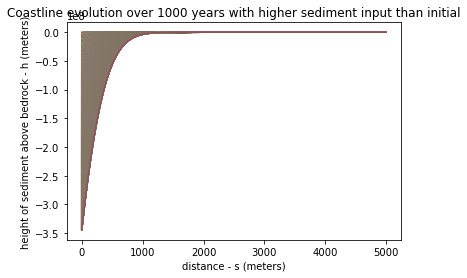

In [102]:
plt.plot(s,h)
plt.xlabel('distance - s (meters)')
plt.ylabel('height of sediment above bedrock - h (meters)')
plt.title ('Coastline evolution over 1000 years with higher sediment input than initial')

## Results 

We decided to simulate the input of the sediment and change that to evaluate the different results with the varying input. As the rate of sediment input is increased, the results become much smoother and make the eresion more steady. With lower rates of sediment input from the town, the results become less smooth closer to when the end of the time period being evaluated. The results make sense because naturally, the coastline is unlikely to erode in a smooth manner, it is more likely to erode at a less uniform rate. This is consistent with results from Le et al. (2015). 

## References 

https://climatetracker.org/on-the-atlantic-shore-coastal-erosion-reveals-frances-legal-shortcomings/  (pic)
https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014WR015690 (results - Figure 4)